In [1]:
!conda install -y sqlalchemy psycopg2

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::matplotlib==3.0.3=py37_1
failed

PackagesNotFoundError: The following packages are not available from current channels:

  - pprint

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/free/linux-64
  - https://repo.anaconda.com/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [2]:
import psycopg2 
try:
    connection = psycopg2.connect(user = "postgres",
                                  password = "postgres",
                                  host = "bdf-postgres-postgresql",
                                  port = "5432",
                                  database = "postgres")
    cursor = connection.cursor()
    # Print PostgreSQL Connection properties
    print ( connection.get_dsn_parameters(),"\n")
    # Print PostgreSQL version
    cursor.execute("SELECT version();")
    record = cursor.fetchone()
    print("You are connected to - ", record,"\n")
    cursor.execute('SELECT * FROM temperatures')  
    rows = cursor.fetchall()  
except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)
finally:
    #closing database connection.
        if(connection):
            cursor.close()
            connection.close()
            print("PostgreSQL connection is closed")

{'user': 'postgres', 'dbname': 'postgres', 'host': 'bdf-postgres-postgresql', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

You are connected to -  ('PostgreSQL 10.7 on x86_64-pc-linux-gnu, compiled by gcc (Debian 6.3.0-18+deb9u1) 6.3.0 20170516, 64-bit',) 

PostgreSQL connection is closed


In [8]:
import pprint
pprint.pprint(rows[0])

(datetime.datetime(2019, 3, 11, 1, 46, 6),
 '5c85bddf6e955233252c7812',
 'BR-1381 - Motor NDE',
 '5c2e32b0d07305123db865d5',
 0.0141629988261461,
 0.644512904184003,
 60.0)


In [4]:
import psycopg2 
try:
    connection = psycopg2.connect(user = "postgres",
                                  password = "postgres",
                                  host = "bdf-postgres-postgresql",
                                  port = "5432",
                                  database = "postgres")
    cursor = connection.cursor()
    # Print PostgreSQL Connection properties
    print ( connection.get_dsn_parameters(),"\n")
    # Print PostgreSQL version
    cursor.execute("SELECT version();")
    record = cursor.fetchone()
    print("You are connected to - ", record,"\n")
    cursor.execute('SELECT date AS "time", temp FROM temperatures WHERE name = \'Floor temperature\'')
    temp = cursor.fetchall()  
except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)
finally:
    #closing database connection.
        if(connection):
            cursor.close()
            connection.close()
            print("PostgreSQL connection is closed")

{'user': 'postgres', 'dbname': 'postgres', 'host': 'bdf-postgres-postgresql', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

You are connected to -  ('PostgreSQL 10.7 on x86_64-pc-linux-gnu, compiled by gcc (Debian 6.3.0-18+deb9u1) 6.3.0 20170516, 64-bit',) 

PostgreSQL connection is closed


In [9]:
import pprint
pprint.pprint(temp[0])

(datetime.datetime(2019, 3, 11, 11, 45, 58), 51.97265625)


datetime.datetime(2019, 3, 11, 11, 45, 58)
51.97265625


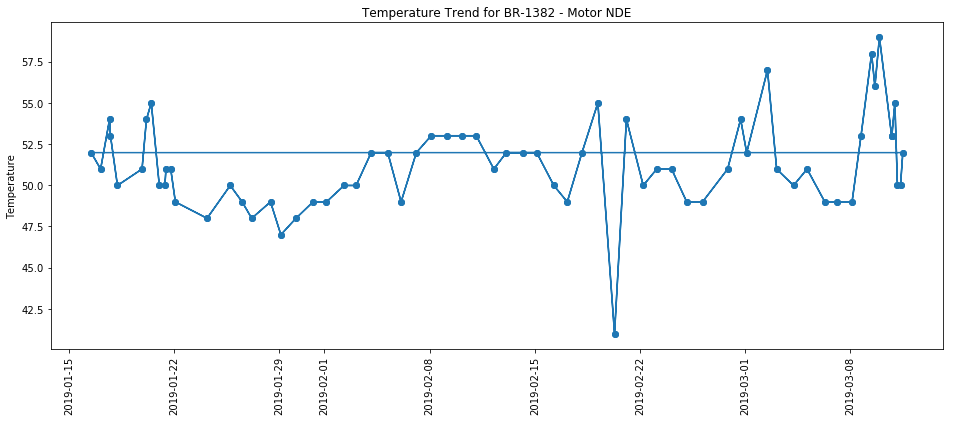

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import datetime
import pprint

pprint.pprint(temp[0][0])
pprint.pprint(temp[0][1])
             
matplotlib.rcParams['figure.figsize'] = [16.0,6.0]
                                      
plt.plot_date(*list(zip(*temp)), '-o', xdate= True)
plt.xticks(rotation=90)
plt.ylabel('Temperature')
plt.title('Temperature Trend for BR-1382 - Motor NDE')
plt.show()
